In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install dm-sonnet

In [ ]:
!pip install tensorflow

In [ ]:
import os
os.chdir("/content/drive/MyDrive/") # add path to folder where SOP.zip file is present

In [ ]:
!pwd

/content/drive/MyDrive


In [ ]:
cp   SOP.zip CLEVR.zip

In [ ]:
ls

In [ ]:
!unzip CLEVR.zip

In [ ]:
cd cell_images

/content/drive/My Drive/cell_images


In [ ]:
ls

model_vgg.h5  Parasitized/  Uninfected/


In [ ]:
!pip3 install torch torchvision


In [ ]:
cd ..

/content/drive/MyDrive


In [ ]:
cd cell_images

/content/drive/MyDrive/cell_images


In [ ]:
ls

model_vgg.h5  Parasitized/  Uninfected/


In [ ]:
cd Parasitized

/content/drive/MyDrive/cell_images/Parasitized


In [ ]:
cd ..

/content/drive/MyDrive/cell_images


In [ ]:
cd Uninfected


/content/drive/MyDrive/cell_images/Uninfected


In [ ]:
cd .. 

/content/drive/MyDrive/cell_images


In [ ]:
from PIL import Image

In [ ]:
!pip install pillow
%reload_ext autoreload
%autoreload

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
ls

model_vgg.h5  Parasitized/  Uninfected/


In [ ]:
x1=min(Image.open("Parasitized/"+f, 'r').size for f in os.listdir("Parasitized"))
x2=max(Image.open("Parasitized/"+f, 'r').size for f in os.listdir("Parasitized"))
y1=min(Image.open("Uninfected/"+f, 'r').size for f in os.listdir("Uninfected"))
y2=max(Image.open("Uninfected/"+f, 'r').size for f in os.listdir("Uninfected"))

In [ ]:
print(x1,x2,y1,y2)

(46, 79) (394, 241) (49, 58) (247, 139)


In [ ]:
cd Parasitized/

/content/drive/MyDrive/cell_images/Parasitized


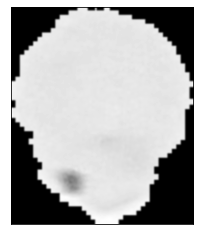

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('C101P62ThinF_IMG_20150918_151942_cell_62.png',0)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [ ]:
cd ..

/content/drive/MyDrive/cell_images


In [ ]:
cd Uninfected/

/content/drive/MyDrive/cell_images/Uninfected


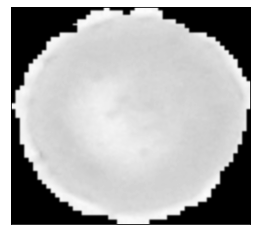

In [ ]:
img = cv2.imread('C99P60ThinF_IMG_20150918_141520_cell_73.png',0)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [ ]:
cd ..

/content/drive/MyDrive/cell_images


In [ ]:
cd ..

/content/drive/MyDrive


In [ ]:
from tensorflow import keras

In [ ]:
keras.backend.set_image_data_format('channels_last')

In [ ]:
import numpy
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
import tensorflow.keras.backend as K
import keras
import keras.backend as K
import numpy as np
import pandas as pd
import math
import cv2
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model, Sequential
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
try:
    if K.backend() == 'theano':
        K.set_image_data_format('channels_first')
    else:
        K.set_image_data_format('channels_last')
except AttributeError:
    if K._BACKEND == 'theano':
        K.set_image_dim_ordering('th')
    else:
        K.set_image_dim_ordering('tf') 

In [ ]:
train_dir = 'cell_images/'
image_size = 150
shift=0.25

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(featurewise_center=False, samplewise_center=True, 
                                   featurewise_std_normalization=False, samplewise_std_normalization=True, 
                                   width_shift_range=shift, height_shift_range=shift,
                                   rotation_range=90, fill_mode='wrap', cval=0.0, horizontal_flip=True, 
                                   brightness_range=None, shear_range=0.1, zoom_range=0.1,
                                   vertical_flip=True, rescale=1./255, preprocessing_function=None, data_format=None,
                                   validation_split=0.2)

train_set = train_datagen.flow_from_directory(train_dir, target_size=(image_size, image_size), color_mode='rgb', classes=None, 
                                              class_mode='categorical', batch_size=256, shuffle=True, seed=None, 
                                              save_to_dir=None, save_prefix='', save_format='png', follow_links=False, 
                                              subset='training', interpolation='nearest')
validation_generator = train_datagen.flow_from_directory(train_dir, target_size=(image_size, image_size),
                                                         batch_size=256, class_mode='categorical', subset='validation')

In [ ]:
(train_set[0][0].shape)

(256, 150, 150, 3)

In [ ]:
nTrain = 22048
nVal = 5510
train_steps = nTrain//256
vaid_steps = nVal//256

In [ ]:

from keras.applications.mobilenet import MobileNet
mob_net= MobileNet(weights='imagenet', include_top=False, input_shape=(image_size, image_size,3))
for layer in mob_net.layers[:-40]:
    layer.trainable = False
 
 # Check the trainable status of the individual layers
for layer in mob_net.layers:
    print(layer, layer.trainable)


In [ ]:
from keras import models
from keras import layers
from keras import optimizers
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split, StratifiedKFold
import keras
import tensorflow as tf 
from keras.models import Sequential, Model
from keras.layers import Input, Flatten, Dense, Dropout, Convolution2D, Conv2D, MaxPooling2D, Lambda, GlobalMaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Activation, AveragePooling2D, Concatenate
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.utils import np_utils

In [ ]:

def get_model():
    
    x = Input((150, 150, 3))
    model = BatchNormalization(axis = 3)(x)
    model = Convolution2D(filters = 32, kernel_size = (3,3), strides = (1,1), padding = 'same', activation='relu')(model)
    model = MaxPooling2D()(model)
    
    model = BatchNormalization(axis = 3)(model)
    model = Convolution2D(filters = 64, kernel_size = (3,3), strides = (1,1), padding = 'same', activation='relu')(model)
    model = MaxPooling2D()(model)
    
    model = BatchNormalization(axis = 3)(model)
    model = Convolution2D(filters = 128, kernel_size = (3,3), strides = (1,1), padding = 'same', activation='relu')(model)
    model = MaxPooling2D()(model)
    
    model = BatchNormalization(axis = 3)(model)
    model = Convolution2D(filters = 64, kernel_size = (3,3), strides = (1,1), padding = 'same', activation='relu')(model) 
    model = GlobalAveragePooling2D()(model)
 
    model = Dense(2, activation = 'sigmoid')(model)
    
    model = Model(x,model)
    
    
    return model

In [ ]:
model = get_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 3)      12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 75, 75, 32)       128       
 hNormalization)                                                 
                                                             

In [ ]:
from keras.models import Model, Sequential
from keras.callbacks import ModelCheckpoint,EarlyStopping,LearningRateScheduler

In [ ]:
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop, math.floor((1 + epoch)/epochs_drop))
   
    return lrate

In [ ]:
checkpoint = ModelCheckpoint("model.h5", monitor = 'val_acc', verbose = 1, save_best_only = True, 
                             save_weights_only = False, mode = 'auto', save_freq = 1)
early = EarlyStopping(monitor = 'val_acc', min_delta = 0.001, patience = 10, verbose = 1, mode = 'auto')
new_lr = LearningRateScheduler(step_decay, verbose = 1)

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate=0.0005, beta_1=0.9, beta_2=0.99),
              metrics=['acc'])
# Train the model
history = model.fit(
      train_set,
      steps_per_epoch=train_steps,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=vaid_steps,
      verbose=1,callbacks = [checkpoint, early])

Epoch 1/10
86/86 [==============================] - 218s 2s/step - loss: 0.5004 - acc: 0.7598 - val_loss: 1.1488 - val_acc: 0.5009
Epoch 2/10
86/86 [==============================] - 192s 2s/step - loss: 0.2415 - acc: 0.9161 - val_loss: 1.1930 - val_acc: 0.5004
Epoch 3/10
86/86 [==============================] - 202s 2s/step - loss: 0.2077 - acc: 0.9281 - val_loss: 1.0265 - val_acc: 0.5162
Epoch 4/10
86/86 [==============================] - 193s 2s/step - loss: 0.1884 - acc: 0.9369 - val_loss: 0.5301 - val_acc: 0.7418
Epoch 5/10
86/86 [==============================] - 195s 2s/step - loss: 0.1884 - acc: 0.9369 - val_loss: 0.3124 - val_acc: 0.8705
Epoch 6/10
86/86 [==============================] - 193s 2s/step - loss: 0.1818 - acc: 0.9387 - val_loss: 0.2518 - val_acc: 0.9128
Epoch 7/10
86/86 [==============================] - 192s 2s/step - loss: 0.1763 - acc: 0.9397 - val_loss: 0.2143 - val_acc: 0.9241
Epoch 8/10
86/86 [==============================] - 194s 2s/step - loss: 0.1777 - a

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image


In [ ]:
history.history['val_acc']

[0.5009300708770752,
 0.500372052192688,
 0.5161830186843872,
 0.741815447807312,
 0.8705357313156128,
 0.9127604365348816,
 0.9241071343421936,
 0.9281994104385376,
 0.9252232313156128,
 0.9302455186843872]

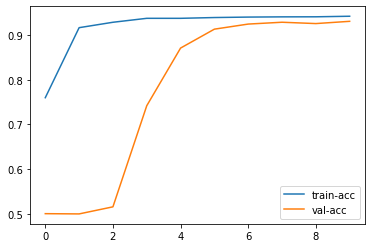

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'],label="train-acc")
plt.plot(history.history['val_acc'],label="val-acc")
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

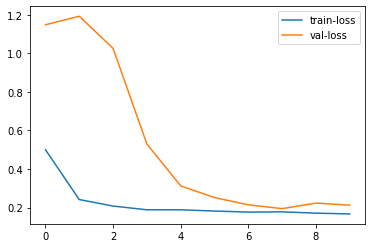

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history.history['loss'],label="train-loss")
plt.plot(history.history['val_loss'],label="val-loss")
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

In [ ]:
model=load_model('model_cnn.h5')
model

In [ ]:
from matplotlib import pyplot
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, Activation
from keras.layers import GlobalMaxPooling2D
from keras.layers.merge import Concatenate
from keras.models import Model
from keras import initializers
from keras.layers.advanced_activations import LeakyReLU, PReLU
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
import tensorflow as tf
from keras.datasets import cifar10
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from keras.applications.xception import Xception
from keras.applications.mobilenet import MobileNet
from keras.applications.vgg19 import VGG19
from keras.layers import Concatenate, Dense, LSTM, Input, concatenate
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
SIZE=64

In [ ]:
train_dir = 'cell_images/'
image_size = 125
shift=0.25

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(featurewise_center=False, samplewise_center=True, 
                                   featurewise_std_normalization=False, samplewise_std_normalization=True, 
                                   width_shift_range=shift, height_shift_range=shift,
                                   rotation_range=90, fill_mode='wrap', cval=0.0, horizontal_flip=True, 
                                   brightness_range=None, shear_range=0.1, zoom_range=0.1,
                                   vertical_flip=True, rescale=1./255, preprocessing_function=None, data_format=None,
                                   validation_split=0.2)

train_set = train_datagen.flow_from_directory(train_dir, target_size=(image_size, image_size), color_mode='rgb', classes=None, 
                                              class_mode='categorical', batch_size=256, shuffle=True, seed=None, 
                                              save_to_dir=None, save_prefix='', save_format='png', follow_links=False, 
                                              subset='training', interpolation='nearest')
validation_generator = train_datagen.flow_from_directory(train_dir, target_size=(image_size, image_size),
                                                         batch_size=256, class_mode='categorical', subset='validation')

Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


In [ ]:
nTrain = 22048
nVal = 5510
train_steps = nTrain//256
vaid_steps = nVal//256

In [ ]:
def getVggAngleModel22():
    input_2 = Input(shape=[1], name="angle")
    base_model = VGG16(weights='imagenet', include_top=False, 
                 input_shape=(125,125,3), classes=2)
    x = base_model.get_layer('block5_pool').output
    

    x = GlobalMaxPooling2D()(x)
    merge_one = Dense(16, activation='relu', name='fc5')(x)
    
    predictions = Dense(2, activation='sigmoid')(merge_one)
    
    model = Model([base_model.input], predictions)
    return model

In [ ]:
model= getVggAngleModel22()

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              metrics=['acc'])
# Train the model
history = model.fit(
      train_set,
      steps_per_epoch=train_steps,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=vaid_steps,
      verbose=1,callbacks = [checkpoint, early])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image


In [ ]:
import numpy as np
img = image.load_img('Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png', target_size=(150, 150))
img_array = image.img_to_array(img).astype('float32')/255

img_batch = np.expand_dims(img_array, axis=0)
print(img_batch.shape)

img_preprocessed = preprocess_input(img_batch)


(1, 150, 150, 3)


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from keras.backend_config import image_data_format
from keras.applications.vgg16 import preprocess_input
import os
import numpy as np
import cv2
from PIL import Image
model = load_model("malaria_cnn.h5")
from array import array



In [ ]:
path = "cell_images/Parasitized"
file_path = path+"/"+"C33P1thinF_IMG_20150619_114756a_cell_179.png"
img = cv2.imread(file_path)
img = Image.fromarray(img, 'RGB')

In [ ]:

path = "cell_images/Uninfected"
file_path = path+"/"+"C100P61ThinF_IMG_20150918_144104_cell_128.png"
img = cv2.imread(file_path)
img = Image.fromarray(img, 'RGB')

In [ ]:
cd MyDrive

/content/drive/MyDrive


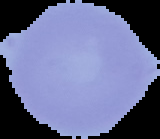

In [ ]:
img

In [ ]:

img = img.resize((SIZE, SIZE))
x=image.img_to_array(img)
x = np.expand_dims(x, axis=0)
a=np.argmax(model.predict(x),axis=1)
if(a==1):
  print('Uninfected')
else:
  print('Infected')

Uninfected
